In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [27]:
iris=pd.read_csv("iris.csv")
iris.head()#iris.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
print(iris.shape)

(150, 5)


In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Checking for null values
iris.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

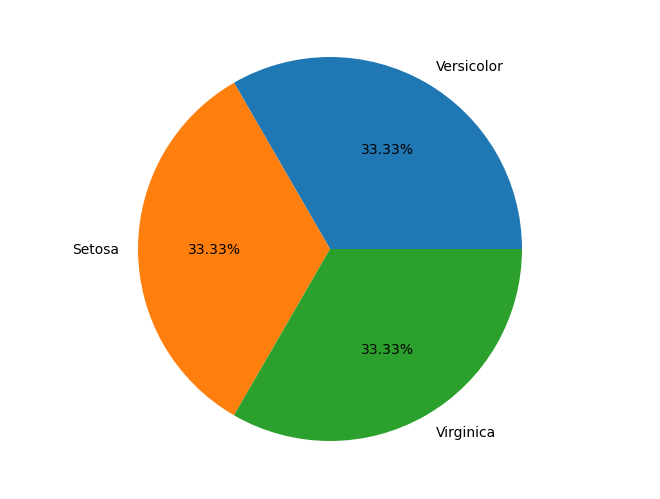

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

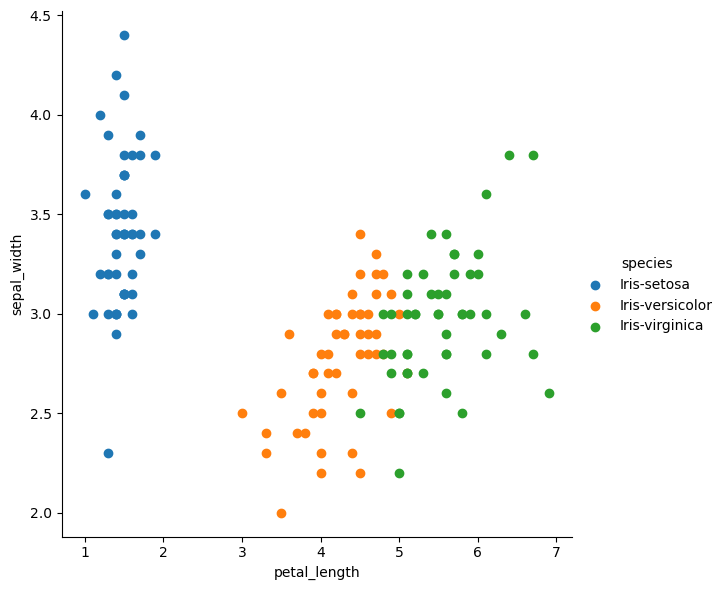

In [16]:
sns.FacetGrid(iris,hue="species",height=6).map(plt.scatter,"petal_length","sepal_width").add_legend()
#how the data look as we can see using Scatter the Plot

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [18]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [19]:
x=iris[['sepal_length','sepal_width','petal_length','petal_width']].values
y=iris[['species']].values

# LogisticRegression

In [20]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(x,y)
prediction = model.predict(x)
print('Accuracy:',metrics.accuracy_score(prediction,y))

Accuracy: 0.9733333333333334


In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y,prediction))

Confusion matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



# SupportVectorMachine 

In [31]:
#using support vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x,y)

pred_y = model1.predict(x)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y,pred_y))

Acc= 0.9733333333333334


# DecisionTree

In [28]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(x,y)
y_pred4 = model4.predict(x)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y,y_pred4)*100)

Accuracy Score: 100.0
